Saving WA_Fn-UseC_-HR-Employee-Attrition[1].csv to WA_Fn-UseC_-HR-Employee-Attrition[1] (3).csv

✅ Dataset 'WA_Fn-UseC_-HR-Employee-Attrition[1] (3).csv' loaded successfully!

🔍 Checking for missing values...

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHo

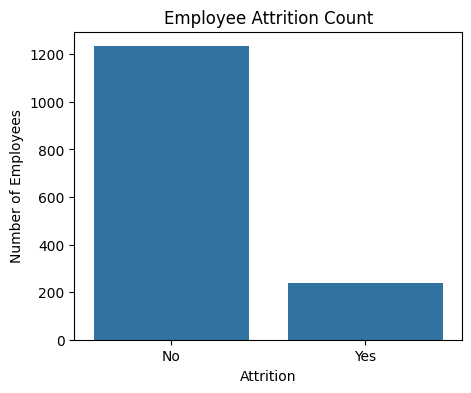

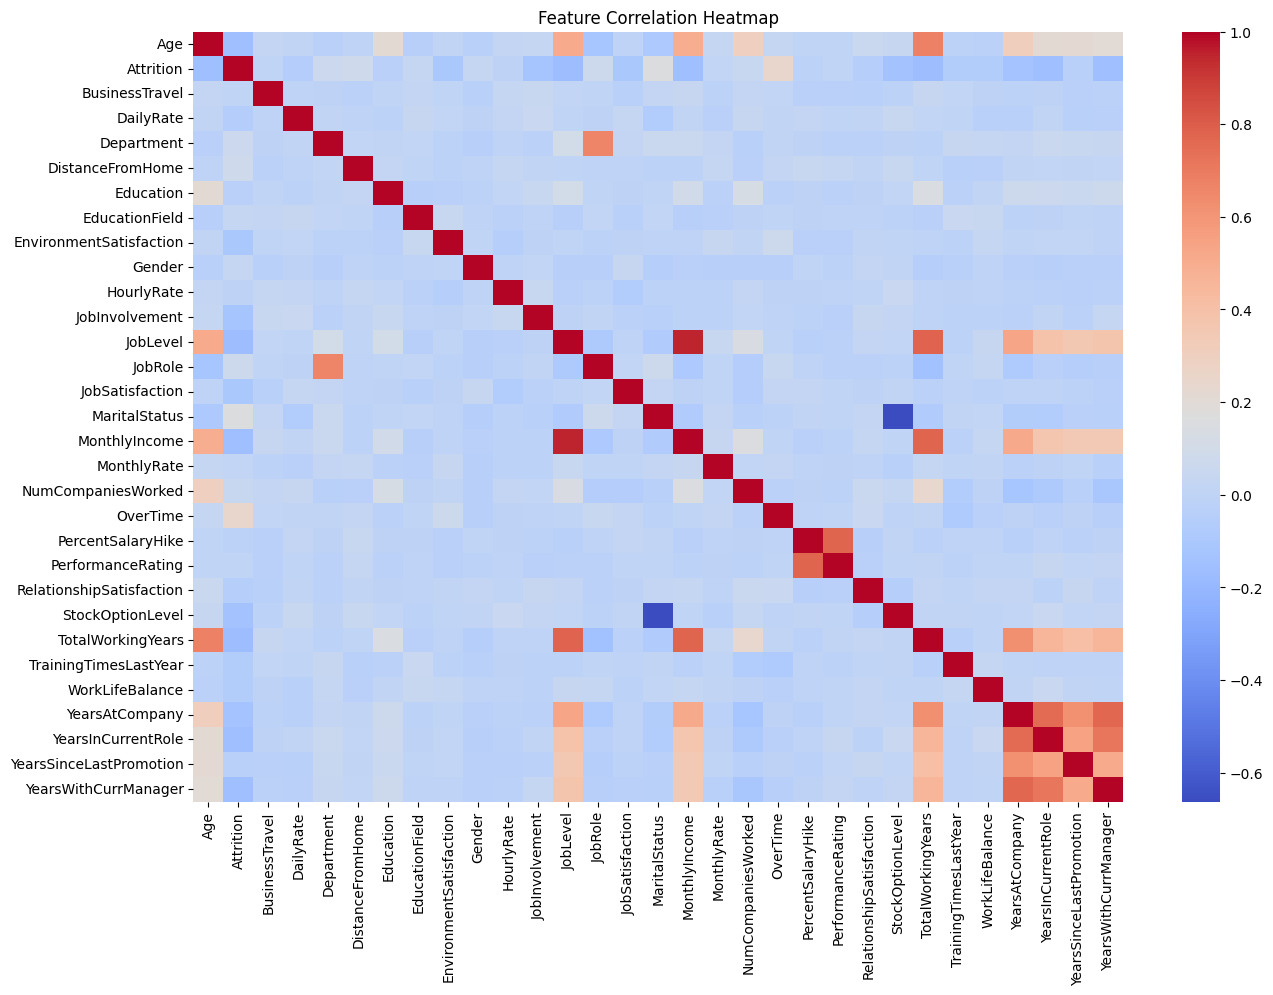


🎯 Model Accuracy: 0.8810


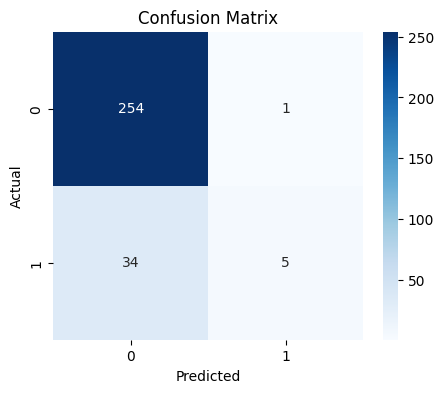


📄 Classification Report:

               precision    recall  f1-score   support

 No Attrition       0.88      1.00      0.94       255
Yes Attrition       0.83      0.13      0.22        39

     accuracy                           0.88       294
    macro avg       0.86      0.56      0.58       294
 weighted avg       0.88      0.88      0.84       294



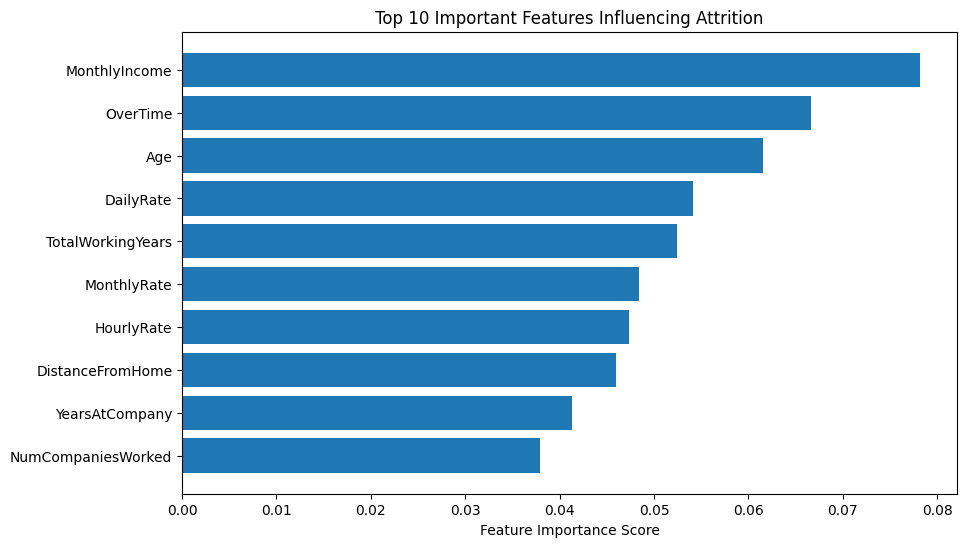

In [7]:
# -----------------------------------------------------
# Step 1: Import Required Libraries
# -----------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# -----------------------------------------------------
# Step 2: Upload and Load the Dataset
# -----------------------------------------------------
from google.colab import files
uploaded = files.upload()  # Upload your CSV file here

# Automatically get the uploaded file name
file_name = list(uploaded.keys())[0]

# Read the dataset
data = pd.read_csv(file_name)
print(f"\n✅ Dataset '{file_name}' loaded successfully!")
data.head()

# -----------------------------------------------------
# Step 3: Data Preprocessing
# -----------------------------------------------------
print("\n🔍 Checking for missing values...\n")
print(data.isnull().sum())

# Convert 'Attrition' column to 0 (No) and 1 (Yes)
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# Drop columns that don’t contribute to prediction
columns_to_drop = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
data.drop(columns=columns_to_drop, axis=1, inplace=True)

# Encode categorical (non-numeric) columns using Label Encoding
label_encoder = LabelEncoder()
for column in data.select_dtypes(include='object').columns:
    data[column] = label_encoder.fit_transform(data[column])

print("\n✅ Preprocessing complete!")
data.head()

# -----------------------------------------------------
# Step 4: Exploratory Data Analysis (EDA)
# -----------------------------------------------------
# Countplot of Attrition
plt.figure(figsize=(5, 4))
sns.countplot(x='Attrition', data=data)
plt.title("Employee Attrition Count")
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel("Number of Employees")
plt.show()

# Heatmap to show correlations between features
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# -----------------------------------------------------
# Step 5: Feature Selection and Train-Test Split
# -----------------------------------------------------
X = data.drop('Attrition', axis=1)  # Features
y = data['Attrition']              # Target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features to bring them to the same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------------------------------
# Step 6: Model Training
# -----------------------------------------------------
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)

# -----------------------------------------------------
# Step 7: Model Evaluation
# -----------------------------------------------------
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Model Accuracy: {accuracy:.4f}")

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\n📄 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["No Attrition", "Yes Attrition"]))

# -----------------------------------------------------
# Step 8: Top Important Features
# -----------------------------------------------------
importances = model.feature_importances_
features = X.columns
top_indices = np.argsort(importances)[-10:]  # Top 10 important features

plt.figure(figsize=(10, 6))
plt.title("Top 10 Important Features Influencing Attrition")
plt.barh(range(len(top_indices)), importances[top_indices], align='center')
plt.yticks(range(len(top_indices)), [features[i] for i in top_indices])
plt.xlabel("Feature Importance Score")
plt.show()
